这次程序包括自己的分析，研究，结果在最后三项。<br>

Before solving this problem, let's analyze the relationship between image and Fourier.<br>

Fourier series indicates that all periodic functions can be expressed by multiplying the sine and cosine functions of different frequencies by different coefficients.<br>

Fourier transform indicates that non-periodic functions can also be expressed as integrals of sign and cosine multiplied by weighted functions.<br>

In other words, if the time domain is Fourier transformed, it can be expressed as a frequency domain, which contains the phase information of the components of each frequency.<br>

![title](../photo/Fourier_transform.jpeg)<br>

But here comes the question. Is there any reason using Fourier series?<br>

The main reason is that the interpretation of the function f(t) that we have to obtain is almost impossible.<br>

we might think it's better to use f(t) as it is between using a function called f(t) and an infinite series of trigonometric functions,<br>

Since there is no knowledge of f(t), it is interpreted and expressed using it as a series.<br>

So why is the time function Fourier transformed and used in the frequency domain?<br>

The reason is that it is easier to use in the frequency domain. It is inefficient to interpret it as a time domain when the signal waveform continues to change.<br>

I don't understand why Fourier series and Fourier transforms are used in images right now,<br>

and I had to understand why the subject's name is "digital image processing" first.<br>

To be exact, should I say that the word spatial domain, not temporal domain, is not clearly understood?<br>

First, the Fourier transform in the time domain represents a graph of the change in time and the corresponding intensity in the frequency domain.<br>

If we look at the contents in this chapter, there are a lot of explanations about the 2D Fourier transform and they force it, so how about thinking like this?<br>

![title](../photo/1D_continuous.jpg)<br>

The 1D Fourier transform we learned in class is basically the same type as the Fourier transform seen in DSP.<br>

When we describe the concept of dimension, we usually refer to the first dimension as line, the second dimension as plane, and the third dimension.<br>

I think I've got the hang of it. Since it may be confusing, from now on, we will express the horizontal and vertical axes of the image as $x,y$ and the frequency domain as $u,v$.<br>

So if we have an image of 512 x 512 we'll think of the x-axis as f(x) for each pixel in pixel coordinates,<br>

 and we'll line it up in a row to complete a period signal of 512 in length.<br>

And we're going to rebuild this integrated one-dimensional Fourier transform by the y-axis.<br>

The result is a Fourier transformed function with a frequency domain of u and v, respectively.<br>

![title](../photo/2D_continuous.jpg)<br>

But why do I use this? Is there any benefit from Fourier transform?<br>

The main reason for Fourier transform is the convenience of operations.<br>

For example, when removing image noise with a line (convergence) operation using a Gaussian filter, <br>
 in the spatial domain
As the mask size of the Gaussian filter increases, the calculation time also increases in proportion to the mask area<br>

In a signal converted into a frequency domain, the line operation is performed as a multiplication operation between frequency components,<br>

and the operation time is kept constant regardless of the size of the mask.<br>

In addition, when the image is converted into a frequency region, a compression operation may be performed to reduce the memory capacity of the image.<br>

Looking at the graph converted into the frequency domain above, most of the images are made of low frequency components.<br>

Therefore, by generating slightly existing high-frequency components in the image storage process,<br>

it is possible to minimize the deterioration in the quality of visually identifiable images and minimize the amount of memory used for storage.<br>

Removing and compressing some components of the image is called loss compression,<br>

and the method using frequency domain conversion has the advantage of reducing memory capacity compared to the lost information.


Python, of course, has all the fft dfts implemented. We can solve the problem as it is,<br>

but I will implement DFT to FFT simply for myself who suffers from DSP experiments anyway and time domain frequency domain.<br>

Before that, let's draw a simple time domain graph.<br>

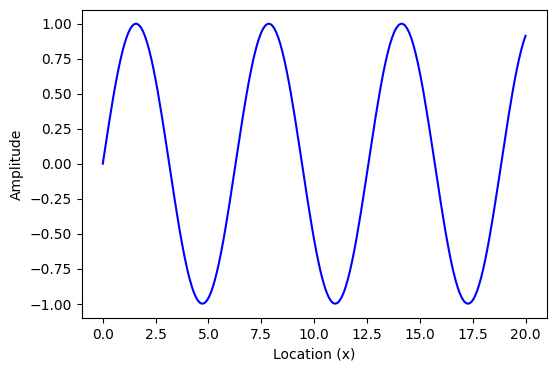

[0 1 2 3 4]


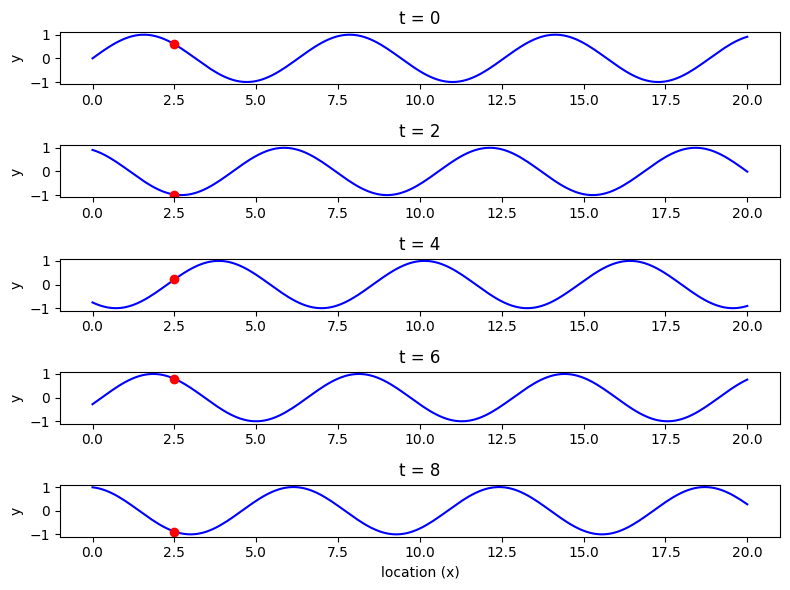

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
""" 
newly knowed knowledge
np.linespace(start,end,n) : Divide the start and end points by n intervals.

"""
x = np.linspace(0, 20, 201) #0~20을 201개 구간(0.1)로 나눕니다.
y = np.sin(x)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'b') #Floating sin graph
plt.ylabel('Amplitude')
plt.xlabel('Location (x)')
plt.show()

fig = plt.figure(figsize = (8,6))
times = np.arange(5)#0~4 범위의 정수 생성
print(times)
n = len(times)

for t in times:
    plt.subplot(n, 1, t+1)
    y = np.sin(x + 2*t)
    plt.plot(x, y, 'b')
    plt.plot(x[25], y [25], 'ro')# x=2.5, y=sin(x=2.5)
    plt.ylim(-1.1, 1.1)
    plt.ylabel('y')
    plt.title(f't = {2*t}')

plt.xlabel('location (x)')
plt.tight_lawet()
plt.show()

I drew a simple picture of the wave graph. Now that we've implemented waves with amplitude and phase in the time domain, let's make them available in the complex wave, and even in the space domain!<br>

DFT (Discrete Fourier Transform)

The discrete Fourier transform can be thought of as multiplying the signal in the time domain by the Euler equation to convert it into the frequency domain. <br>

$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]}$

N = Number of samples

n = Current Sample

k = the current frequency, where k[[0,N-1]

$x_n$ = sine value at sample n

$X_k$= DFT containing both amplitude and phase information

$amp = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}$

$phase = atan2(Im(X_k), Re(X_k))$

$ $ \omega = 2* \pi*frequency$

Let's make a non-periodic signal and see if we can apply the DFT formula

Let's create three sine waves with frequencies 1Hz, 4Hz, 7Hz, amplitudes 3, 1 and 0.5, and zero phase.<BR>
The conditions are from 0 to 1 section, and after sampling in 100 sections,

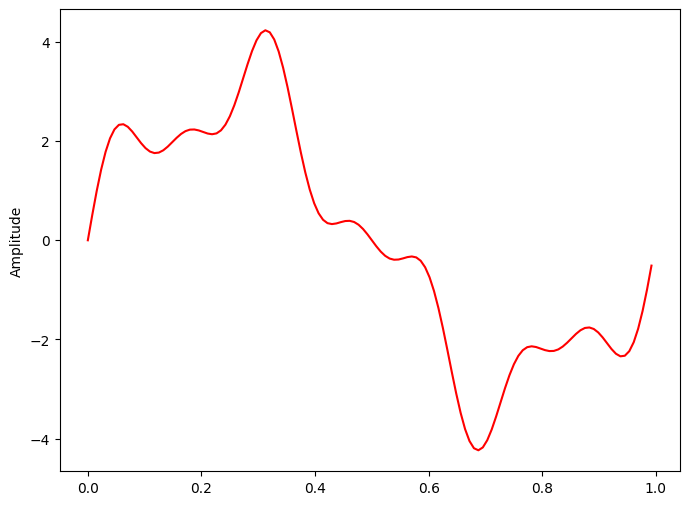

In [2]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [3]:
def DFT(x):

    N = len(x)# period(every interval) of x
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(W, x)#convolutuon of vector e
    
    return X


lenth of N:  128
component of N:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]


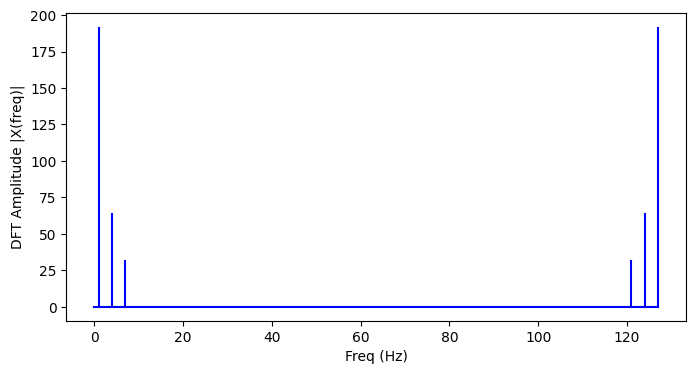

In [4]:
""" 
stem(x,y,use_line_collection = True)

stemlines.set_visible(False) ## stem line 안보이게
baseline.set_visible(False) ## base line 안보이게
markers.set_color('red')# 색상 고를 수 있게
stemlines.set_linestyle('--') #라인 스타일 바꿀 수 있게
stemlines.set_color('purple') #라인 색깔 바꿀 수 있게 해줌
"""

X = DFT(x)
# calculate the frequency
# sampling rate is 100 and interval is 0.01

N = len(X)
n = np.arange(N)
print("lenth of N: ",N)
print("component of N: ",n)

T = N/sr #because function is unperiodic, we can guess T equals to 1
freq = n/T #frequency is 100 

plt.figure(figsize = (8, 4))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

Here, we can see that the output of the DFT is symmetric at half the sampling rate, which is called the Nyquist frequency or folding frequency.<br>
This means that the highest frequency output of the DFT is half the sampling rate,<br>
as the rate-sampled signal can be completely reconstructed if only frequency components are included less than half the sampling frequency.

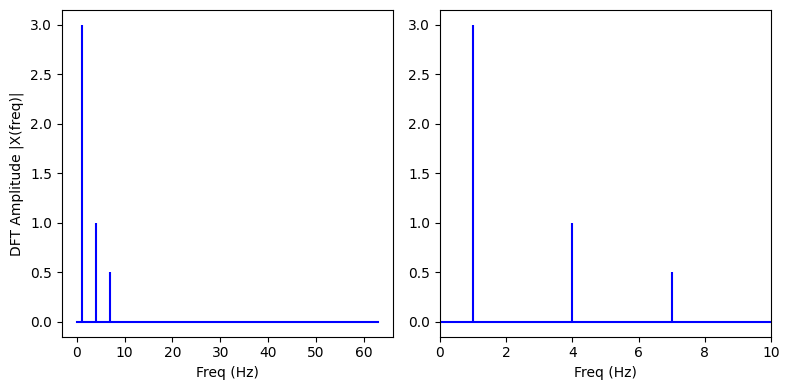

In [5]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_lawet()
plt.show()

Inverse DFT is the time domain conversion of the frequency domain<br>
The formula can be applied as follows.<br>

$x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i\cdot 2\pi{kn/N}}}$

In [6]:
def IDFT(X):

    N = len(X)# period(every interval) of x
    n = np.arange(N)
    k = n.reshape((N, 1))
    W_ = np.exp(2j * np.pi * k * n / N)
    
    x = 1/N*(np.dot(W_, X))#convolutuon of vector e
    
    return x

c:\Users\joong\anaconda3\envs\ml\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


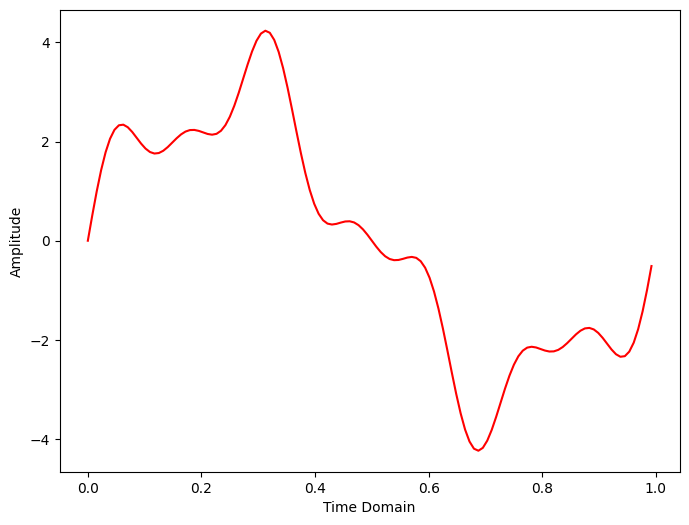

In [7]:
x_IDFT = IDFT(X)
plt.figure(figsize = (8, 6))
plt.plot(t, x_IDFT, 'r')
plt.xlabel('Time Domain')
plt.ylabel('Amplitude')

plt.show()

Fast fourier transform(FFT)
Fast Fourier Transform (FFT) is an efficient algorithm for calculating the DFT of a sequence.<BR>
A split-conquest algorithm that recursively divides the DFT into smaller DFTs and interrupts the calculation.<BR>
The complexity of the DFT is reduced from O(n2) to O(nlogn). where n is the size of the data.<BR>

Symmetry of DFT <BR>
FFT is an algorithm that uses the symmetry of DFT, so let's find out what it means.<BR>

$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}}$

$X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{(k+N)n/N}}} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{n}}\cdot e^{-i2\pi{kn/N}}}$

$e^{-i2\pi{n}} = 1$

$X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = X_k $

$X_{k+i\cdot N} = X_k, \text{ for any integer i}$

![title](../photo/euler.jpg)<br>
Basically, we know that Fourier transforms implement Euler's equation as a basis, and we know that Euler's equation rotates in a circle based on real numbers and imaginary contractions.<br>
Here, the basic logic is to divide a given discrete signal into several short-length signals to obtain the DFT of the divided signals, and then combine the results to perform the DFT of the given signal.<BR>

As an implementation method, the entire series is first divided into even and odd numbers, and recursively divided using this symmetry. This repetition eventually reduces the amount of calculation.<BR>



$$\begin{aligned}
X_{k} &= \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} \\
&= \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{k(2m)/N}}} + \sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{k(2m+1)/N}}} \\
&= \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{km/(N/2)}}} + + e^{-i2\pi{k/N}}\sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{km/(N/2)}}}
\end{aligned}$$

Now let's implement FFT.

In [8]:
def FFT(x):
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        W = np.exp(-2j*np.pi*np.arange(N)/ N)
         
        X = np.concatenate(\
            [X_even+W[:int(N/2)]*X_odd,
             X_even+W[int(N/2):]*X_odd])
        return X

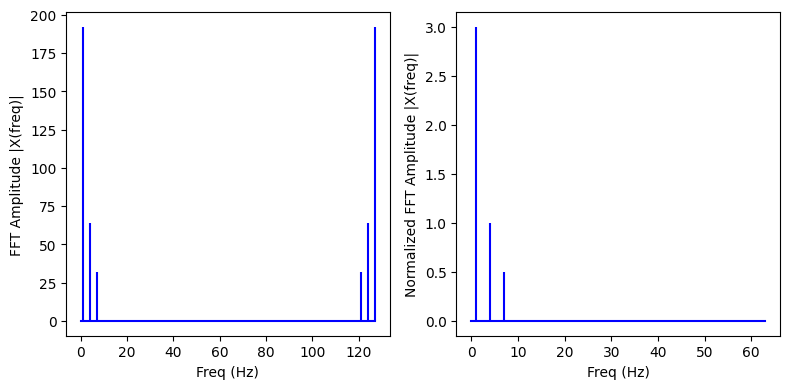

In [9]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_lawet()
plt.show()

In [10]:
def IFFT(X):
    N = len(X)
    
    if N == 1:
        return X
    else:
        x_even = IFFT(X[::2])
        x_odd = IFFT(X[1::2])
        W_ = np.exp(2j*np.pi*np.arange(N)/ N)
         
        x = (np.concatenate([x_even+W_[:int(N/2)]*x_odd, x_even+W_[int(N/2):]*x_odd]))
        return (1/2) * x
    

128


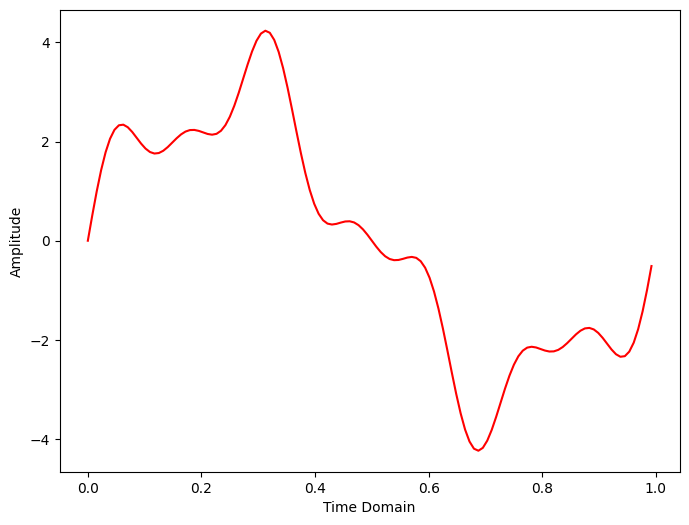

In [11]:
print(len(X))
x_IFFT = IFFT(X)
plt.figure(figsize = (8, 6))
plt.plot(t, x_IFFT, 'r')
plt.xlabel('Time Domain')
plt.ylabel('Amplitude')

plt.show()

In [12]:
def FFT(x):
    x = np.asarray(x, dtype=complex)
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        W = np.exp(-2j*np.pi*np.arange(N)/ N)
         
        X = np.concatenate([X_even+W[:int(N/2)]*X_odd,X_even+W[int(N/2):]*X_odd])#Seperate and calculate the function, It's pretty similar logic with merge sort
        return X

def IFFT(X):
    N = len(X)
    
    if N == 1:
        return X
    else:
        x_even = IFFT(X[::2])
        x_odd = IFFT(X[1::2])
        W_ = np.exp(2j*np.pi*np.arange(N)/ N)
         
        x = (np.concatenate([x_even+W_[:int(N/2)]*x_odd, x_even+W_[int(N/2):]*x_odd]))#concatenate X_k,X_k+N
        return (1/2) * x


def FFT2D(x):
    """ 
    Let's think how to implement the 2D FFT
    There's 512 x 512 2D image array
    at first, take 512(column) fouruier transformed list,
    Then, We can get the 512 1D array of fourier transformed list
    we Know space signal have x and y coordinate, should take fourier transform in every columns once more
    """
    height, width = x.shape[0], x.shape[1]
    #X =np.zeros(x.shape)
    X =np.zeros(x.shape,dtype=complex)
    if len(X.shape) == 2:
        for i in range(height):
            X[i, :] = FFT(x[i, :])
        #print(X[:3])
        for i in range(width):
            X[:, i] = FFT(X[:, i])
        #print(X[:3])
    return X

def IFFT2D(X):
    height, width = X.shape[0], X.shape[1]
    x =np.zeros(X.shape,dtype=complex)
    #X =np.zeros(x.shape)

    if len(X.shape) == 2:
        for i in range(height):
            x[i, :] = IFFT(X[i, :])

        for i in range(width):
            x[:, i] = IFFT(x[:, i])
    x=np.real(x) #Image data of dtype complex128 cannot be converted to float
    return x



512 512


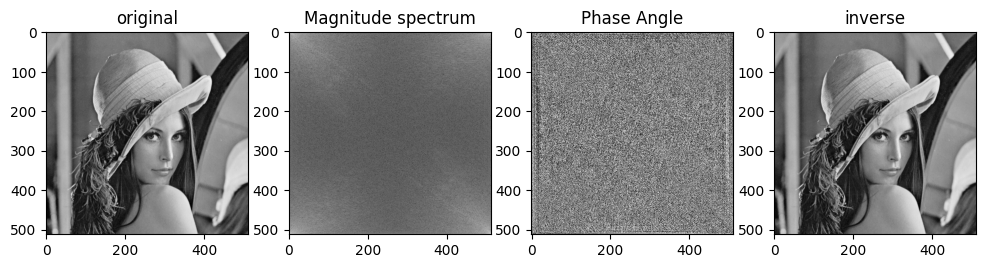

In [18]:
img = cv2.imread('../Lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#take grayscale
height, width = gray.shape
dimension = np.zeros(gray.shape, dtype=complex)
print(height,width)

dft = FFT2D(gray)
out = np.log(1+np.abs(dft))
inverse_dft = IFFT2D(dft)
#out2 = 20*np.log(np.abs(inverse_dft))
fig = plt.figure(figsize=(12,8))
plt.subplot(141),plt.imshow(gray, cmap='gray'),plt.title('original')
plt.subplot(142),plt.imshow(out, cmap='gray'),plt.title('Magnitude spectrum')
plt.subplot(143), plt.imshow(np.angle(dft), "gray"), plt.title("Phase Angle")
plt.subplot(144),plt.imshow(inverse_dft, cmap='gray'),plt.title('inverse')

plt.show()


It takes nearly 10 seconds to execute a function even though fast ft is used.<br>
For reference, running the image only on a real axis produces quite interesting results.<br>
![title](../photo/real_only.jpg)<br>
Let's use the fft function built into Python to plot and compare the phases.<br>

In [14]:

""" Logic
First, Let's implement every function through opencv and see the result
after than, I will implement fourier transform and compare result. 
"""
def fourier(source):
    img = cv2.imread(source)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#take grayscale

    img_c1 = gray
    img_c2 = np.fft.fft2(img_c1)
    img_c3 = np.fft.fftshift(img_c2)
    img_c4 = np.fft.ifftshift(img_c3)
    img_c5 = np.fft.ifft2(img_c4)

    fig=plt.figure(figsize=(20,12))
    plt.subplot(161), plt.imshow(img_c1, "gray"), plt.title("Original Image")
    plt.subplot(162), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Magnitude Spectrum")
    plt.subplot(163), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
    plt.subplot(164), plt.imshow(np.angle(img_c2), "gray"), plt.title("Phase Angle")
    plt.subplot(165), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
    plt.subplot(166), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

    plt.show()




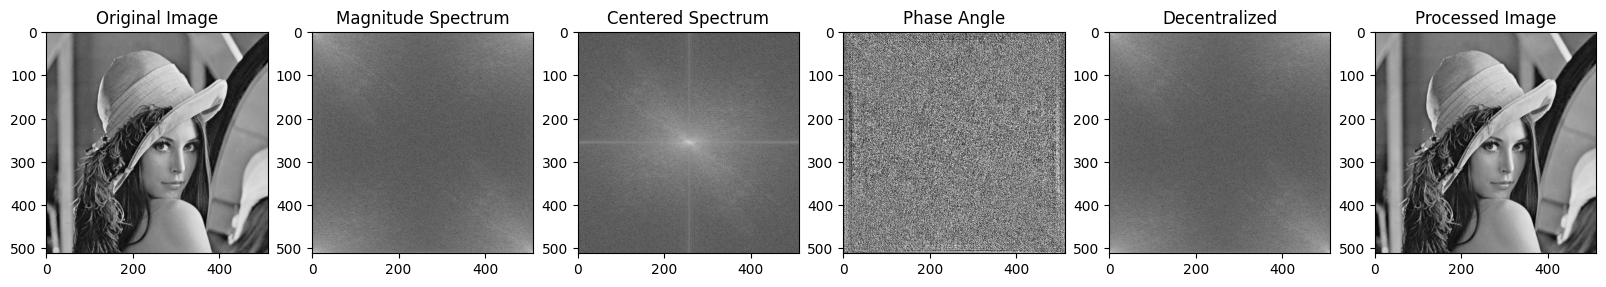

In [15]:
fourier('../Lenna.png')

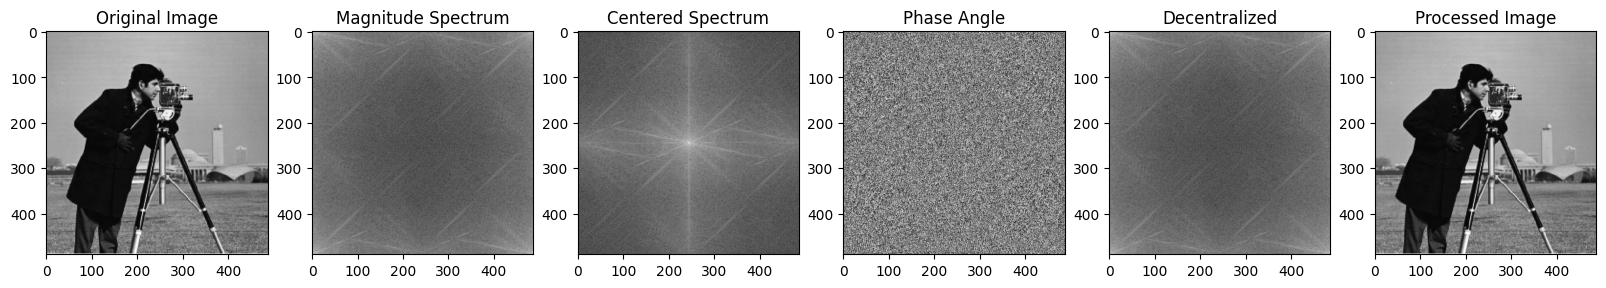

In [16]:
fourier('../Cameraman.png')

reference:<br>
https://everyday-image-processing.tistory.com/165<br>
https://1coding.tistory.com/139#%EB%--%--%EC%A-%--%ED%--%B-%--%EC%--%--%EC%--%--%EC%-D%--%--%EB%B-%--%ED%--%--%--%EA%B-%BC%EC%A-%--%---%EB%-B%A-%EA%B-%--%---%--%EB%B-%--%ED%--%B-%ED%--%--<br>
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html<br>
ppt